In [1]:
import os, sys, glob

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import loompy
import logging

logger = logging.getLogger()
logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
    datefmt='%H:%M:%S')

In [ ]:
s = '10X370_2'

f = f'/datb/sl/camiel/scATAC/samples/{s}/{s}_5kb.loom'

with loompy.connect(f) as ds:
    print(ds.layers.keys())
    print(np.sum(ds[0,:]))

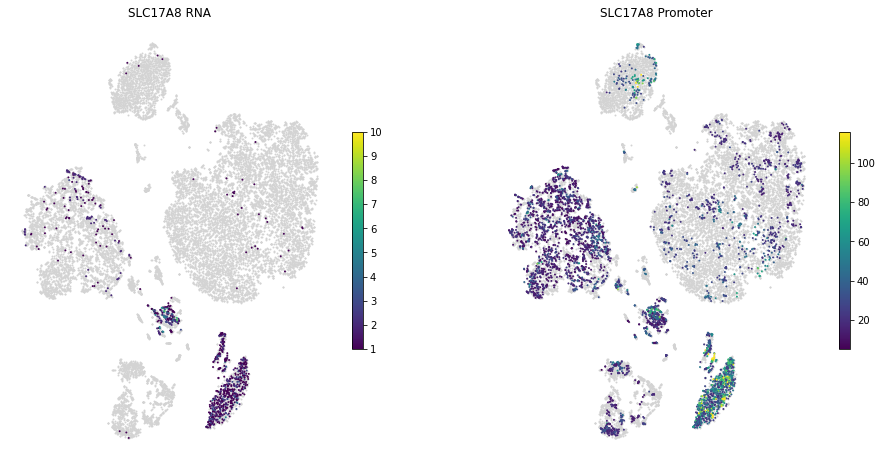

In [34]:
gene = 'SLC17A8'
emb = 'TSNE'
epsilon = 15

f_RNA = '/data/proj/AllenInst/RNA_builds/RNA_build_Harmony/data/All.loom'
f_prom = '/data/proj/AllenInst/ATAC_builds/ATAC_build_Harmony/All/All_prom.loom'

fig, ax = plt.subplots(1,2, figsize=(16,8))
with loompy.connect(f_RNA, 'r') as ds:
    v = ds.layer['pooled'][ds.ra.Gene == gene,:].flatten()
    x = np.where(v > 0)[0]
    ax[0].scatter(ds.ca[emb][:,0], ds.ca[emb][:,1], c='lightgray', marker='.', lw=0, s=epsilon)
    ax[0].set_title(f'{gene} RNA')
    im = ax[0].scatter(ds.ca[emb][x,0], ds.ca[emb][x,1], c=v[x], cmap='viridis', marker='.', lw=0, s=epsilon)
    fig.colorbar(im, ax=ax[0], orientation='vertical', shrink=.5)
    ax[0].axis('off')
    
with loompy.connect(f_prom) as ds:    
    ax = ax.flatten()
    v = ds.layer['pooled_CPM'][ds.ra.Gene == gene,:].flatten()
    x = np.where(v > 0)[0]
    ax[1].scatter(ds.ca[emb][:,0], ds.ca[emb][:,1], c='lightgray', marker='.', lw=0, s=epsilon)
    ax[1].set_title(f'{gene} Promoter')
    im = ax[1].scatter(ds.ca[emb][x,0], ds.ca[emb][x,1], c=v[x], cmap='viridis', vmax = np.quantile(v[x], .99), marker='.', lw=0, s=epsilon)
    fig.colorbar(im, ax=ax[1], orientation='vertical', shrink=.5)
    ax[1].axis('off')

In [18]:
from cytograph.clustering import PolishedLouvain

min_cells_precluster = 400

with loompy.connect(f_RNA, 'r') as ds:

    cls, n = np.unique(ds.ca.Clusters, return_counts=True)
    
    if min(n) < min_cells_precluster:
        print('performing broad clustering for peak calling')
        
        pl = PolishedLouvain(outliers=False, graph="RNN", embedding="TSNE", resolution = 1, min_cells=400)
        labels = pl.fit_predict(ds)

16:35:52 INFO     Louvain community detection


performing broad clustering for peak calling


16:36:07 INFO     Using DBSCAN to mark outliers
16:36:07 INFO     Using neighborhood to mark outliers
16:36:08 INFO     Breaking clusters
16:36:13 INFO     Smoothing cluster identity on the embedding
16:36:17 INFO     Marking tiny clusters as outliers


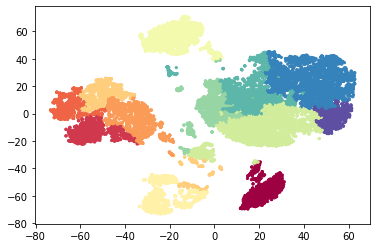

In [21]:
with loompy.connect(f_RNA, 'r') as ds:

    plt.scatter(ds.ca.TSNE[:,0], ds.ca.TSNE[:,1], s=5, c=labels, cmap='Spectral')

In [23]:
cls, n = np.unique(labels, return_counts=True)

print(cls)
print(n)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[1192  926  732 1396 1183 1323 1800 2502 1219 1615 2768  615]
